# Clustering Data

In [ ]:
# Loading Sample Data for Clustering

import pandas as pd
data = pd.read_csv('Clustering Data.csv')
pd.set_option('display.max_columns', 100)
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')
data.head()

The dataset has 15144 rows and 90 columns


,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,BookingChannel_SCA_Website_Booking,BookingChannel_SY_Vacation,BookingChannel_Tour_Operator_Portal,age_group_0-17,age_group_18-24,age_group_25-34,age_group_35-54,age_group_55+,true_origins_ori_ANC,true_origins_ori_BOS,true_origins_ori_CUN,true_origins_ori_CZM,true_origins_ori_DCA,true_origins_ori_DFW,true_origins_ori_HRL,true_origins_ori_IFP,true_origins_ori_JFK,true_origins_ori_LAN,true_origins_ori_LAS,true_origins_ori_LAX,true_origins_ori_MCO,true_origins_ori_MDW,true_origins_ori_MIA,true_origins_ori_MSP,true_origins_ori_PHX,true_origins_ori_PSP,true_origins_ori_PUJ,true_origins_ori_PVR,true_origins_ori_RSW,true_origins_ori_SAN,true_origins_ori_SEA,true_origins_ori_SFO,true_origins_ori_SJD,true_origins_ori_STT,true_origins_ori_SXM,true_origins_ori_TPA,true_origins_ori_ZIH,true_destination_dest_ANC,true_destination_dest_BOS,true_destination_dest_CUN,true_destination_dest_CZM,true_destination_dest_DCA,true_destination_dest_DFW,true_destination_dest_GRB,true_destination_dest_HRL,true_destination_dest_HUX,true_destination_dest_IFP,true_destination_dest_JFK,true_destination_dest_LAN,true_destination_dest_LAS,true_destination_dest_LAX,true_destination_dest_LIR,true_destination_dest_MBJ,true_destination_dest_MCO,true_destination_dest_MDW,true_destination_dest_MIA,true_destination_dest_MSP,true_destination_dest_MZT,true_destination_dest_PHX,true_destination_dest_PNS,true_destination_dest_PSP,true_destination_dest_PUJ,true_destination_dest_PVR,true_destination_dest_RSW,true_destination_dest_SAN,true_destination_dest_SEA,true_destination_dest_SFO,true_destination_dest_SJD,true_destination_dest_SJU,true_destination_dest_STT,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Loading Transformed Sample Data
data2 = pd.read_csv('sample_data_transformed.csv')
data2['PostalCode'].head()

<ipython-input-9-473d9a955756>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('sample_data_transformed.csv')


,PostalCode
0,55439
1,56044
2,56044
3,NaN
4,NaN


In [ ]:
# Missing values check
missing_values = data.isnull().sum()
missing_values

uid                          0
PNRLocatorID                 0
avg_amt                      0
round_trip                   0
group_size                   0
                            ..
UflyMemberStatus_Standard    0
seasonality_Q1               0
seasonality_Q2               0
seasonality_Q3               0
seasonality_Q4               0
Length: 90, dtype: int64

In [ ]:
# Preserve the original data
clustering_data = data.copy()
clustering_data.head(10)

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,BookingChannel_SCA_Website_Booking,BookingChannel_SY_Vacation,BookingChannel_Tour_Operator_Portal,age_group_0-17,age_group_18-24,age_group_25-34,age_group_35-54,age_group_55+,true_origins_ori_ANC,true_origins_ori_BOS,true_origins_ori_CUN,true_origins_ori_CZM,true_origins_ori_DCA,true_origins_ori_DFW,true_origins_ori_HRL,true_origins_ori_IFP,true_origins_ori_JFK,true_origins_ori_LAN,true_origins_ori_LAS,true_origins_ori_LAX,true_origins_ori_MCO,true_origins_ori_MDW,true_origins_ori_MIA,true_origins_ori_MSP,true_origins_ori_PHX,true_origins_ori_PSP,true_origins_ori_PUJ,true_origins_ori_PVR,true_origins_ori_RSW,true_origins_ori_SAN,true_origins_ori_SEA,true_origins_ori_SFO,true_origins_ori_SJD,true_origins_ori_STT,true_origins_ori_SXM,true_origins_ori_TPA,true_origins_ori_ZIH,true_destination_dest_ANC,true_destination_dest_BOS,true_destination_dest_CUN,true_destination_dest_CZM,true_destination_dest_DCA,true_destination_dest_DFW,true_destination_dest_GRB,true_destination_dest_HRL,true_destination_dest_HUX,true_destination_dest_IFP,true_destination_dest_JFK,true_destination_dest_LAN,true_destination_dest_LAS,true_destination_dest_LAX,true_destination_dest_LIR,true_destination_dest_MBJ,true_destination_dest_MCO,true_destination_dest_MDW,true_destination_dest_MIA,true_destination_dest_MSP,true_destination_dest_MZT,true_destination_dest_PHX,true_destination_dest_PNS,true_destination_dest_PSP,true_destination_dest_PUJ,true_destination_dest_PVR,true_destination_dest_RSW,true_destination_dest_SAN,true_destination_dest_SEA,true_destination_dest_SFO,true_destination_dest_SJD,true_destination_dest_SJU,true_destination_dest_STT,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,4C4152534F4E44696420493F7C20676574207468697320...,AAIARF,0.000000,1,0.125,1,0.050919,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
6,4F4D4541524144696420493F7C20676574207468697320...,AAIARF,0.000000,1,0.125,1,0.050919,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7,5041484C44696420493F7C206765742074686973207269...,AAIGGF,0.074727,1,0.000,0,0.045262,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [ ]:
# Prepare columns for KMeans by dropping two string columns "uid" and "PNRLocatorID"
columns_to_cluster = clustering_data.iloc[:, 2:]
columns_to_cluster.head(10)

,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,BookingChannel_SCA_Website_Booking,BookingChannel_SY_Vacation,BookingChannel_Tour_Operator_Portal,age_group_0-17,age_group_18-24,age_group_25-34,age_group_35-54,age_group_55+,true_origins_ori_ANC,true_origins_ori_BOS,true_origins_ori_CUN,true_origins_ori_CZM,true_origins_ori_DCA,true_origins_ori_DFW,true_origins_ori_HRL,true_origins_ori_IFP,true_origins_ori_JFK,true_origins_ori_LAN,true_origins_ori_LAS,true_origins_ori_LAX,true_origins_ori_MCO,true_origins_ori_MDW,true_origins_ori_MIA,true_origins_ori_MSP,true_origins_ori_PHX,true_origins_ori_PSP,true_origins_ori_PUJ,true_origins_ori_PVR,true_origins_ori_RSW,true_origins_ori_SAN,true_origins_ori_SEA,true_origins_ori_SFO,true_origins_ori_SJD,true_origins_ori_STT,true_origins_ori_SXM,true_origins_ori_TPA,true_origins_ori_ZIH,true_destination_dest_ANC,true_destination_dest_BOS,true_destination_dest_CUN,true_destination_dest_CZM,true_destination_dest_DCA,true_destination_dest_DFW,true_destination_dest_GRB,true_destination_dest_HRL,true_destination_dest_HUX,true_destination_dest_IFP,true_destination_dest_JFK,true_destination_dest_LAN,true_destination_dest_LAS,true_destination_dest_LAX,true_destination_dest_LIR,true_destination_dest_MBJ,true_destination_dest_MCO,true_destination_dest_MDW,true_destination_dest_MIA,true_destination_dest_MSP,true_destination_dest_MZT,true_destination_dest_PHX,true_destination_dest_PNS,true_destination_dest_PSP,true_destination_dest_PUJ,true_destination_dest_PVR,true_destination_dest_RSW,true_destination_dest_SAN,true_destination_dest_SEA,true_destination_dest_SFO,true_destination_dest_SJD,true_destination_dest_SJU,true_destination_dest_STT,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,0.019524,0,0.000,0,0.029703,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0.081774,1,0.000,0,0.039604,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0.026650,0,0.125,1,0.069307,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,0.026650,0,0.125,1,0.069307,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,0.000000,1,0.000,0,0.035361,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,0.000000,1,0.125,1,0.050919,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
6,0.000000,1,0.125,1,0.050919,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
7,0.074727,1,0.000,0,0.045262,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8,0.035414,1,0.000,0,0.082037,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9,0.035414,1,0.125,1,0.018388,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20


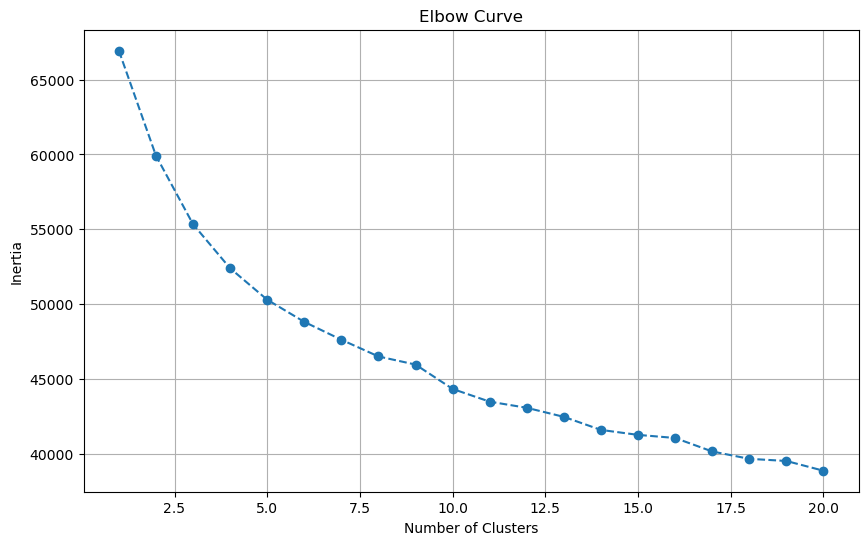

In [ ]:
# Find an optimum cluster we should use in K-Mean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1, 21)


for cluster_num in cluster_range:

    print(f'Iteration Number: {cluster_num}')

    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(columns_to_cluster)
    inertia.append(kmeans.inertia_)


#Design plot figures
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# Applying K-Means using 5 clusters
kmeans = KMeans(n_clusters=5, n_init=30)
kmeans.fit(columns_to_cluster)

# Add cluster labels as a new column in the original data
data['Cluster'] = kmeans.labels_

# Print cluster(result)
data.head(10000)
data.to_csv('clustered_data.csv', index=False)

In [ ]:
# Summary of cluster size
number_of_clusters = data['Cluster'].nunique()

for i in range(number_of_clusters):
    print(f"The size of the Cluster {i}  |  {data[data['Cluster'] == i].shape[0]}")

The size of the Cluster 0  |  2354
The size of the Cluster 1  |  4127
The size of the Cluster 2  |  3838
The size of the Cluster 3  |  2384
The size of the Cluster 4  |  2441


In [ ]:
# Merge cluster column from clustering data to transformed sample data by aligning uid
final_data = data2.merge(data[['uid', 'Cluster']], on='uid', how='left')
final_data.head(10000)
final_data.to_csv('final_clustered_data.csv', index=False)

# Describing Clusters

In [ ]:
# Loading the final data
final_data = pd.read_csv('/content/final_clustered_data(in).csv')

<ipython-input-17-fe96c26df96d>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data = pd.read_csv('/content/final_clustered_data(in).csv')


In [ ]:
final_data.head()

,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,...,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination,Cluster
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/2014,10/6/2014,504554455244696420493F7C2067657420746869732072...,...,55+,MSP,DFW,0,1,0,Q4,21,DFW,3
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/2014,8/19/2014,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,28,JFK,3
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/2014,8/14/2014,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,23,JFK,3
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/2014,3/27/2014,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,0
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/2014,3/27/2014,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,0


In [ ]:
# Assign selected meaningful variables for analysis into a list
columns_list = ['GenderCode', 'PostalCode', 'BkdClassOfService', 'TrvldClassOfService', 'BookingChannel', 'BaseFareAmt', 'UflyMemberStatus', 'CardHolder', 'StopoverCode', 'age_group', 'true_origins', 'final_destination', 'true_destination', 'round_trip', 'group', 'seasonality', 'days_pre_booked','Cluster']

In [ ]:
# Extract a dataframe with just selected variables for analysis
tested_data = final_data[columns_list]
tested_data.head()

,GenderCode,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,UflyMemberStatus,CardHolder,StopoverCode,age_group,true_origins,final_destination,true_destination,round_trip,group,seasonality,days_pre_booked,Cluster
0,M,55439,Coach,Coach,Outside Booking,88.43,Standard,False,NaN,55+,MSP,DFW,DFW,0,0,Q4,21,3
1,F,56044,Coach,Coach,SCA Website Booking,399.07,Standard,False,O,35-54,MSP,MSP,JFK,1,0,Q3,28,3
2,F,56044,Coach,Coach,SCA Website Booking,399.07,Standard,False,NaN,35-54,MSP,MSP,JFK,1,0,Q3,23,3
3,F,NaN,Coach,Coach,SCA Website Booking,118.14,non-ufly,NaN,X,25-34,LAN,SEA,MSP,0,1,Q1,49,0
4,F,NaN,Coach,Coach,SCA Website Booking,118.14,non-ufly,NaN,NaN,25-34,LAN,SEA,MSP,0,1,Q1,49,0


In [ ]:
tested_data.dtypes

,0
GenderCode,object
PostalCode,object
BkdClassOfService,object
TrvldClassOfService,object
BookingChannel,object
BaseFareAmt,float64
UflyMemberStatus,object
CardHolder,object
StopoverCode,object
age_group,object


In [ ]:
# Categorize selected variables into Quantitative list and Qualitative list
qualitative_variables = []
quantitative_variables = []

for column in tested_data.columns:
    if tested_data[column].dtype == 'object':
        qualitative_variables.append(column)
    elif column == 'Cluster':
        continue
    else:
        quantitative_variables.append(column)

print(f'qualitative variables are {qualitative_variables}')
print(f'quantitative variables are {quantitative_variables}')

qualitative variables are ['GenderCode', 'PostalCode', 'BkdClassOfService', 'TrvldClassOfService', 'BookingChannel', 'UflyMemberStatus', 'CardHolder', 'StopoverCode', 'age_group', 'true_origins', 'final_destination', 'true_destination', 'seasonality']
quantitative variables are ['BaseFareAmt', 'round_trip', 'group', 'days_pre_booked']


In [ ]:
# For every Qualitative variable, compute Mode by Cluster
mode_df = tested_data.groupby('Cluster')[qualitative_variables].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_df

<ipython-input-30-7eb086c0d095>:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  mode_df = tested_data.groupby('Cluster')[qualitative_variables].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


,GenderCode,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,UflyMemberStatus,CardHolder,StopoverCode,age_group,true_origins,final_destination,true_destination,seasonality
Cluster,,,,,,,,,,,,,
0,F,55391,Coach,Coach,SCA Website Booking,non-ufly,False,O,55+,SFO,MSP,MSP,Q3
1,F,55038,Coach,Coach,SCA Website Booking,non-ufly,False,O,35-54,MSP,MSP,LAS,Q1
2,F,55311,Coach,Coach,Outside Booking,non-ufly,False,O,35-54,MSP,MSP,LAS,Q1
3,F,55331,Coach,Coach,SCA Website Booking,Standard,False,O,55+,MSP,MSP,LAS,Q4
4,M,92683.0,Coach,Coach,Outside Booking,non-ufly,False,O,25-34,JFK,MSP,MSP,Q3


In [ ]:
# For every Quantitative variable, compute Mean by Cluster
mean_df = tested_data.groupby('Cluster')[quantitative_variables].mean()
mean_df

,BaseFareAmt,round_trip,group,days_pre_booked
Cluster,,,,
0,266.650000,0.582906,0.507123,50.997436
1,267.438895,0.884374,0.709798,60.062692
2,301.775441,0.889418,0.673441,61.768605
3,308.325994,0.882935,0.586707,67.800598
4,254.583933,0.526945,0.335772,36.250914


In [ ]:
# Merge Mode and Mean results to inspect general features among 5 Clusters
cut_down_data = mode_df.join(mean_df)
cut_down_dataset

cut_down_data.to_csv('cut_down_dataset.csv')

# Visualizing Customer Segments

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
final_clustered_data = pd.read_csv('/final_clustered_data(in).csv')
final_clustered_data.head()

<ipython-input-5-4d19f72587f0>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  final_clustered_data = pd.read_csv('/final_clustered_data(in).csv')


,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,...,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination,Cluster
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/2014,10/6/2014,504554455244696420493F7C2067657420746869732072...,...,55+,MSP,DFW,0,1,0,Q4,21,DFW,3
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/2014,8/19/2014,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,28,JFK,3
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/2014,8/14/2014,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,23,JFK,3
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/2014,3/27/2014,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,0
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/2014,3/27/2014,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,0


In [ ]:
 # Number of customers by cluster and group
customers_by_group = final_clustered_data.groupby('Cluster')['group'].value_counts().unstack()
customers_by_group

group,0,1
Cluster,,
0,1730,1780
1,2171,5310
2,2330,4805
3,1797,2551
4,2724,1377


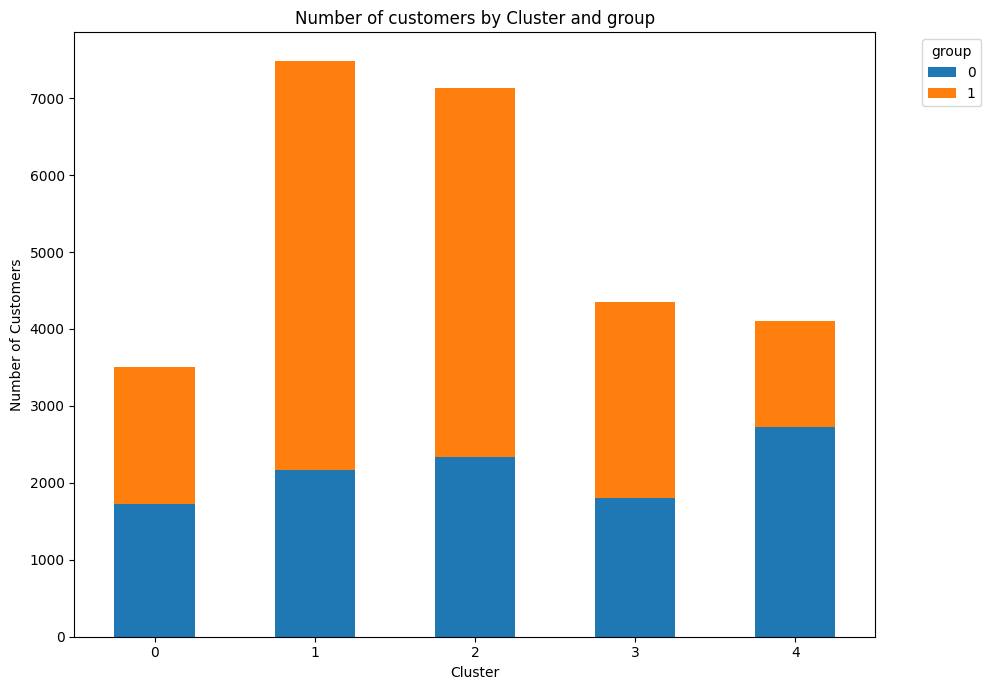

In [ ]:
# Number of customers by Cluster and group
customers_by_group.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Number of customers by Cluster and group')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

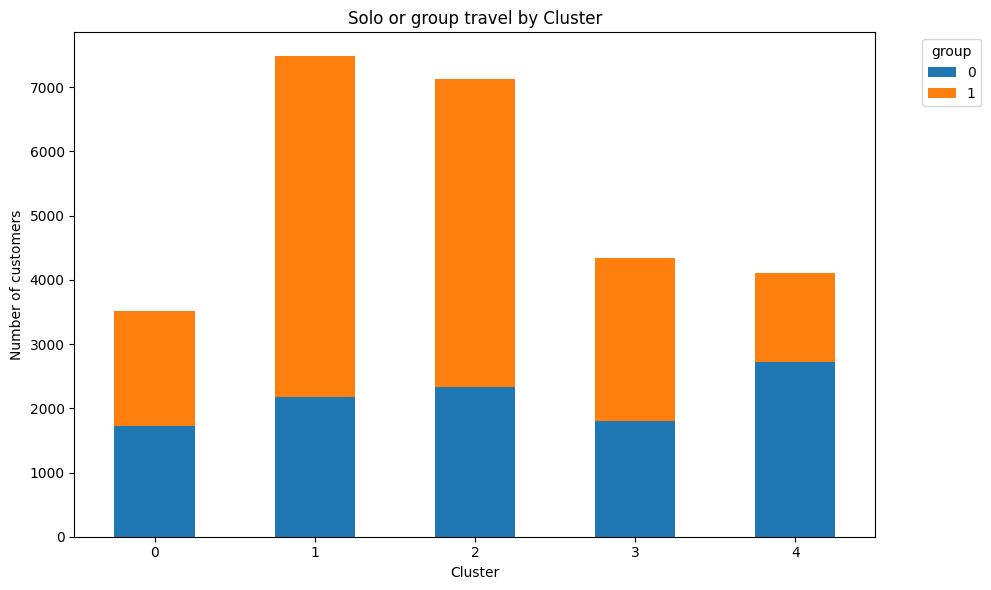

In [ ]:
# Solo or group travel by Cluster
group_by_cluster = final_clustered_data.groupby('Cluster')['group'].value_counts().unstack()
group_by_cluster.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Solo or group travel by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of customers')
plt.xticks(rotation=0)
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

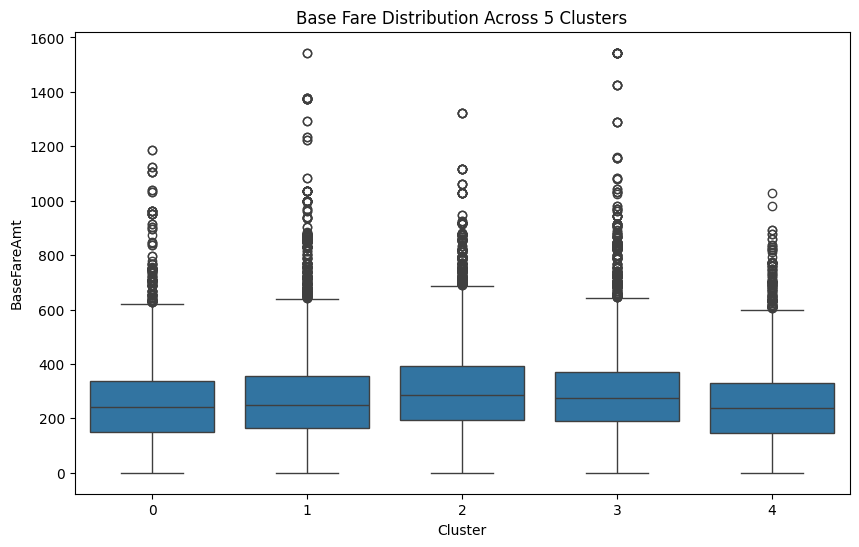

In [ ]:
# Base Fare Distribution Across 5 Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='BaseFareAmt', data= final_clustered_data)
plt.title('Base Fare Distribution Across 5 Clusters')
plt.xlabel('Cluster')
plt.ylabel('BaseFareAmt')
plt.show()

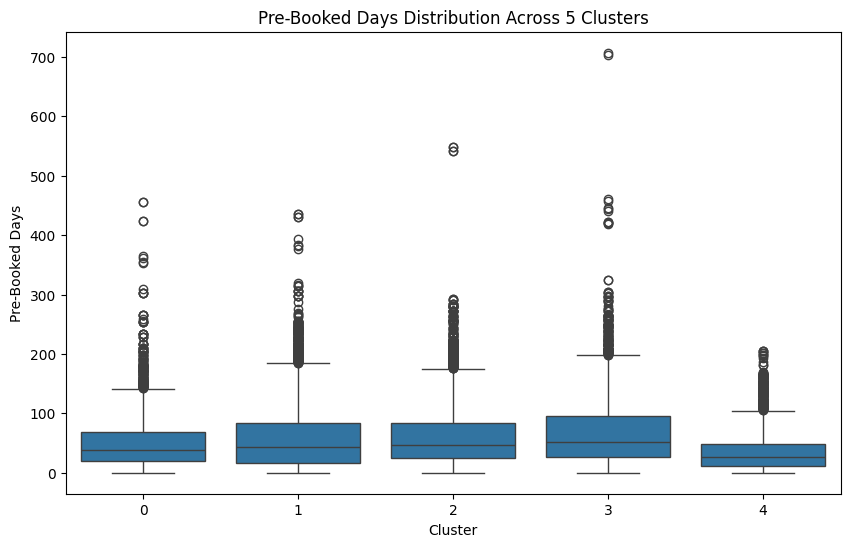

In [ ]:
# Pre-Booked Days Distribution Across 5 Clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='days_pre_booked', data= final_clustered_data)
plt.title('Pre-Booked Days Distribution Across 5 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Pre-Booked Days')
plt.show()

Other visuals in the report are generated in Tableau